# **Spliting Data & Cross Validation Using The Scikit-Learn Library:**

### Author: Spencer Long

### Github: https://github.com/Spencer-Long

---
---
---

### Splitting & Training:

In statistics and machine learning we usually split our data into two subsets: training data and testing data (and sometimes to three: train, validate and test), and fit our model on the train data, in order to make predictions on the test data. When we do that, one of two things might happen: 

1. we overfit our model 
1. we underfit our model  

We don’t want either of these things to happen, because they affect the predictability of our model — we might be using a model that has lower accuracy and/or is ungeneralized (meaning you can’t generalize your predictions on other data).

**Image: Flow Chart of Training and Fitting Data**

![Data FLow](https://image.slidesharecdn.com/mlregression-splittingdatasets-170914113926/95/machine-learning-splitting-datasets-3-638.jpg?cb=1505389251)



---
### Overfitting:

Overfitting means that model we trained has trained “too well” and is now, well, fit too closely to the training dataset. This usually happens when the model is too complex (i.e. too many features/variables compared to the number of observations). This model will be very accurate on the training data but will probably be very unaccurate on untrained or new data. It is because this model is not generalized (or not AS generalized), meaning you can generalize the results and can’t make any inferences on other data, which is, ultimately, what you are trying to do. Basically, when this happens, the model learns or describes the “noise” in the training data instead of the actual relationships between variables in the data. This noise, obviously, isn’t part in of any new dataset, and cannot be applied to it.

### Underfitting:

In contrast to overfitting, when a model is underfitted, it means that the model does not fit the training data and therefore misses the trends in the data. It also means the model cannot be generalized to new data. As you probably guessed (or figured out!), this is usually the result of a very simple model (not enough predictors/independent variables). It could also happen when, for example, we fit a linear model (like linear regression) to data that is not linear. It almost goes without saying that this model will have poor predictive ability (on training data and can’t be generalized to other data).

**Note:** It is worth mentioning that underfitting is not as prevalent as overfitting. Nevertheless, we want to avoid both of those problems in data analysis. You might say we are trying to find the middle ground between under and overfitting our model. As you will see, train/test split and cross validation help to avoid overfitting more than underfitting

**Image: Example of overfitting & underfitting**

![Overfitting Image](https://cdn-images-1.medium.com/max/1600/1*tBErXYVvTw2jSUYK7thU2A.png)

### Imports:

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

### Data:

In [2]:
# Load the Diabetes Housing dataset

diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn which we imported above

# Declare the columns names we will need within our df

columns = ['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'] 

df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame

y = diabetes.target # define the target variable (dependent variable) as y

print('The shape of the dataframe "df" is (rows,columns):', df.shape)
print()
df.head(5) # First five rows of df so we can get an idea of what it looks like

The shape of the dataframe "df" is (rows,columns): (442, 10)



,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


---
# **Splitting The Data Using Scikit-Learn's train_test_split:**

**Documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Now we can use the train_test_split function in order to make the split. The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 or 70/30.

![Data FLow](https://cdn-images-1.medium.com/max/800/1*-8_kogvwmL1H6ooN1A1tsQ.png)

In [3]:
# create training and testing vars using scikit-learn's train_test_split function we imported above
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=4)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# This portion of code will inform us of our split (The ratio or percentage of data that is partitioned for training and testing)
print('Percentage of data that is training data:', X_train.shape[0]/df.shape[0]*100)
print('Percentage of data that is testing data:', X_test.shape[0]/df.shape[0]*100)

(353, 10) (353,)
(89, 10) (89,)
Percentage of data that is training data: 79.86425339366517
Percentage of data that is testing data: 20.13574660633484


### Fitting A Model To Our Data:

We will now fit Scikit-Learn's Linear Regression model to our training data.

In [22]:
# Declaring our model or classifier (aka: 'clf'). You will see this notation in alot of examples and documentation.
clf = linear_model.LinearRegression()

# Fitting our model to the training data or set
model = clf.fit(X_train,y_train)

# Now we will try to predict the test data using our classifier or model 
predictions = clf.predict(X_test)

### Predictions Vs. True Values:

Lets take a look at what our models predicted values vs. our true values plotted together.

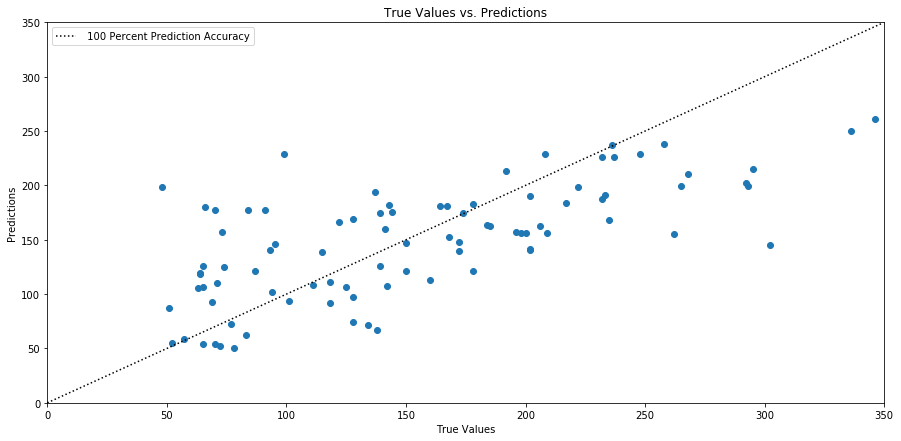

In [5]:
#standard_dev = np.std(predictions)

# Plot Creation
plt.figure(figsize = (15, 7))
plt.scatter(y_test,predictions)
plt.plot(range(0,350),range(0,350), color = 'k', label=' 100 Percent Prediction Accuracy',ls=':')
#plt.fill_between(range(0,350),range(0,350)- standard_dev,range(0,350)+ standard_dev, alpha = 0.3, label = r'$\pm 1 \sigma$',color = 'blue')

# Plot Labels & Axes
plt.legend()
plt.xlim(0,350)
plt.ylim(0,350)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')

**Plot:** As we can see we have not predicted the true values very well, but what is the accuracy of our predictions? Lets calculate our accuracy below...

In [6]:
print('Score:', model.score(X_test, y_test)) 

Score: 0.4610882915687331


**model.score():** returns the coefficient R^2 is defined as (1 - u/v), where u is the regression sum of squares ((y_true - y_pred) ** 2).sum() and v is the residual sum of squares ((y_true - y_true.mean()) ** 2).sum(). Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0. 

As we can see our model that we have created is essentially predicting our data with an accuracy of the above R^2 score.

---

### Summary of Data Seperation:

Here is a summary of what we did: 

1. Loaded in the data 
1. Split it into a training and testing sets using Scikit-Learn train_test_split function
1. Fitted a regression model to the training data
1. Made predictions based on this data and tested the predictions on the test data 

**Note:** Train/test split does have its dangers... what if the split we make isn’t random? What if one subset of our data has only people from a certain state, employees with a certain income level but not other income levels, only women or only people at a certain age? (imagine a file ordered by one of these). This will result in overfitting, even though we’re trying to avoid it! This is where cross validation comes in!

---
---
---

# **Cross Validation With Scikit-Learn:** 
---



### Cross Validation In A Nutshell:

**Testing accuracy is a high variance estimate...**

random_state is the seed used by the random number generator

Thus far what we have been doing in this lesson is splitting our dataset into two pieces, so that the model can be trained and tested on different data. What we have found through this process is that testing accuracy is a better estimate than training accuracy of out-of-sample performance. What we will now demonstrate is the essence of cross validation. If we were to investigate train_test_split's random_state perameter we will find that depending which random state we choose we will get a different test score. This is due to the fact that the testing accuracy is a high variance estimate since changing which observations happen to be in the testing set can significantly change the testing accuracy itself. This is where cross validation comes in to give us a solution to the high variance estimate. Cross validation essentially is just creating a bunch of train_test_split's, calculating the testing accuracy for each, and then averaging the results together. As you can see from the code below we will apply a random state from 0 to 9 (note the variance of test scores for each random state), measure the scores, and then take the average. 

In [20]:
# Imports:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Data:
# Read in the iris data
iris = load_iris()

# Create X (features) and y (response)
X = iris.data
y = iris.target

# Empty list to append score values
scores = []

'''Here we are creating a for loop to split the data 10 times with 10 different random states 
and then taking the mean of the scores'''

for i in range(0,10):
    
    # use train/test split with different random_state values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i)
    
    # check classification accuracy of KNN with K=5
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Score for random state =', i, ':',metrics.accuracy_score(y_test, y_pred))
    
    # append scores to list
    
    scores.append(metrics.accuracy_score(y_test, y_pred))

print()
print('The mean test score is:',np.array(scores).mean())

Score for random state = 0 : 0.9736842105263158
Score for random state = 1 : 1.0
Score for random state = 2 : 1.0
Score for random state = 3 : 0.9473684210526315
Score for random state = 4 : 0.9736842105263158
Score for random state = 5 : 0.9473684210526315
Score for random state = 6 : 0.9736842105263158
Score for random state = 7 : 0.8947368421052632
Score for random state = 8 : 0.9210526315789473
Score for random state = 9 : 1.0

The mean test score is: 0.9631578947368421


---

### K Fold Cross Validation:  

One of the methods of data seperation that Scikit-Learn's cross_validation function uses is called K Fold cross validation. It goes about its process of seperation as follows.

1. Split the dataset into K equal partitions (or "folds").
2. Use fold 1 as the testing set and the union of the other folds as the training set.
3. Calculate testing accuracy.
4. Repeat steps 2 and 3 K times, using a different fold as the testing set each time.
5. Use the average testing accuracy as the estimate of out-of-sample accuracy.



**Benefits of cross-validation:**

* More reliable estimate of out-of-sample performance than train/test split
* Can be used for selecting tuning parameters, choosing between models, and selecting features

**Drawbacks of cross-validation:**

* Can be computationally expensive (What is your time worth and how powerful is your system?)



**Image: Diagram of K = 5 fold cross validation**

![KFolds cross validation](https://blog.contactsunny.com/wp-content/uploads/2018/08/cross_validation.png)

Now you don't necessarily need to know what is going on with the code below but I just want to show you what is happening during k fold cross validation with some code. If you view the output you will hopefully get an idea of what is occuring during cross validation. Assume we have a data set that contains the numbers 0 through 24 and we apply cross validation to it with $k = 5$.

In [8]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


### Scikit-Learn Cross Val Funtion:

In [9]:
# Import
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

# Take the mean of scores
print('\n The mean score is:',scores.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]

 The mean score is: 0.9666666666666668


---
# A Beautiful Thing! GridSearchCV

### Searching Multiple Parameters Simultaneously With Scikit-Learn's Grid Search Cross Validation:


In [10]:
# Define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [11]:
param_grid = dict(n_neighbors = k_range, weights = weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [12]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [13]:
# View the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']].head(10)

,mean_test_score,std_test_score,params
0,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.953333,0.052068,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.960000,0.053333,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'distance'}"


### Examining The Best Results Made Easy:

In [14]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


---
---
# Future Investigations: 

* Reducing computational expense using RandomizedSearchCV

    * Searching many different parameters at once may be computationally infeasible
    * RandomizedSearchCV searches a subset of the parameters, and you control the computational "budget"

**Sources:**

* GridSesrchCV Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* Scikit-Learn Documentation: https://scikit-learn.org/stable/documentation.html